Обучение завершено.
Фиксированный шаг: 50 эпох
Адаптивный шаг: 19 эпох


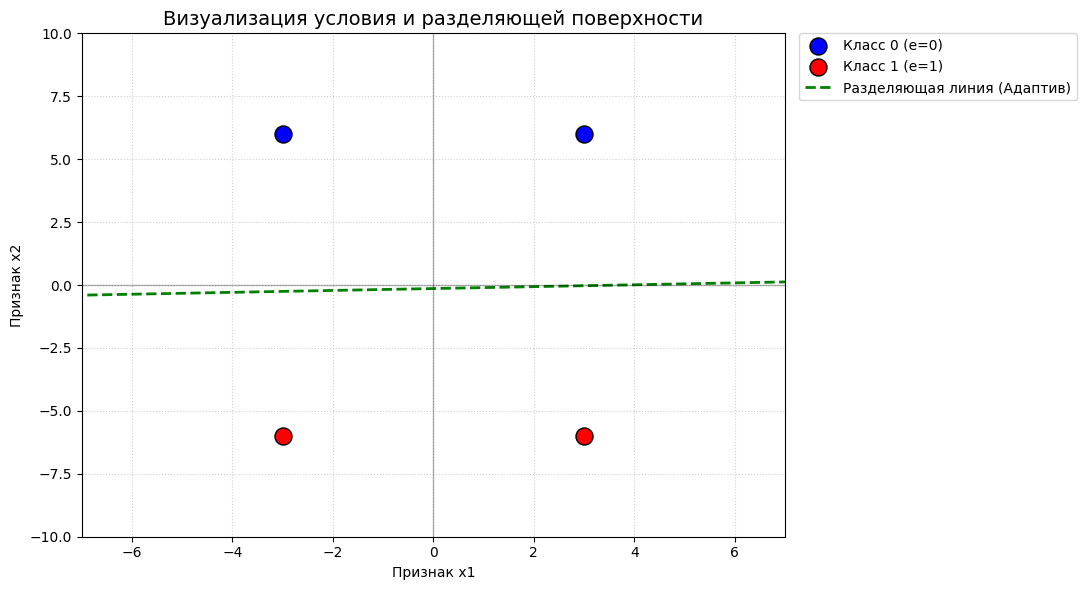

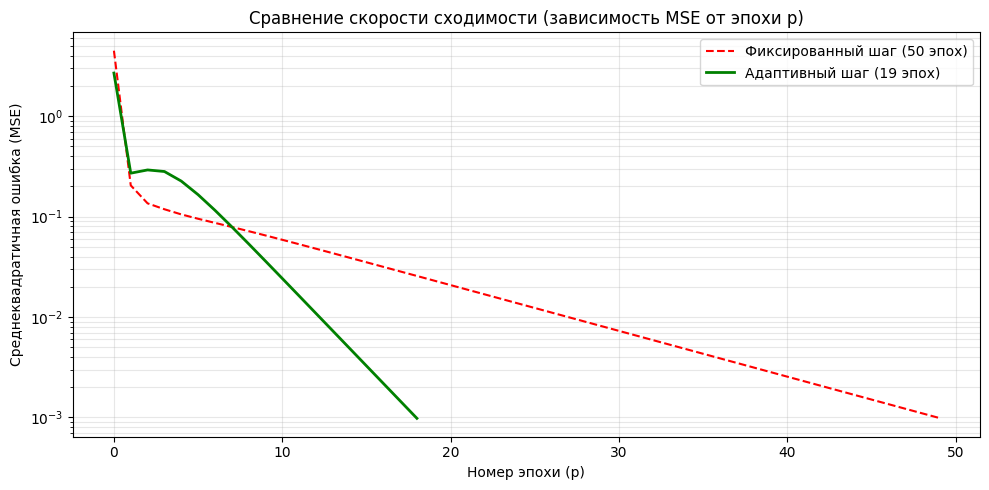


РЕЖИМ ТЕСТИРОВАНИЯ

Введите координаты x1, x2 через запятую (или 'q' для выхода): 3, 6
Результат для точки [3.0, 6.0]:
  Сумматор S = -0.0244
  Определен КЛАСС 0

Введите координаты x1, x2 через запятую (или 'q' для выхода): 3, -6
Результат для точки [3.0, -6.0]:
  Сумматор S = 1.0196
  Определен КЛАСС 1

Введите координаты x1, x2 через запятую (или 'q' для выхода): 0, 5
Результат для точки [0.0, 5.0]:
  Сумматор S = 0.0528
  Определен КЛАСС 0

Введите координаты x1, x2 через запятую (или 'q' для выхода): q


In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3, 6], [-3, 6], [3, -6], [-3, -6]])
e = np.array([0, 0, 1, 1])

# Параметры обучения
target_mse = 0.001
max_epochs = 500
fixed_alpha = 0.01

def train_perceptron(X_data, e_labels, alpha_type='fixed', alpha_val=0.01):
    """Функция обучения персептрона"""
    np.random.seed(42)
    w = np.random.uniform(-0.5, 0.5, 2)
    w0 = np.random.uniform(-0.5, 0.5)
    mse_history = []

    for epoch in range(max_epochs):
        errors = []
        for i in range(len(X_data)):
            # Вычисление выхода (линейный сумматор)
            S = np.dot(X_data[i], w) + w0
            delta = e_labels[i] - S

            # Выбор шага обучения
            if alpha_type == 'adaptive':
                alpha = 1 / (1 + np.sum(X_data[i] ** 2))
            else:
                alpha = alpha_val

            # Обновление весов
            w += alpha * delta * X_data[i]
            w0 += alpha * delta

            errors.append(delta ** 2)

        current_mse = np.mean(errors)
        mse_history.append(current_mse)
        if current_mse <= target_mse:
            break

    return w, w0, mse_history

# Запуск двух экспериментов
w_f, w0_f, hist_f = train_perceptron(X, e, 'fixed', fixed_alpha)
w_a, w0_a, hist_a = train_perceptron(X, e, 'adaptive')

print(f"Обучение завершено.")
print(f"Фиксированный шаг: {len(hist_f)} эпох")
print(f"Адаптивный шаг: {len(hist_a)} эпох")

#ГРАФИК №1: ВИЗУАЛИЗАЦИЯ УСЛОВИЯ
plt.figure(figsize=(11, 6))

plt.scatter(X[:2, 0], X[:2, 1], color='blue', s=150, label='Класс 0 (e=0)', edgecolors='black', zorder=5)
plt.scatter(X[2:, 0], X[2:, 1], color='red', s=150, label='Класс 1 (e=1)', edgecolors='black', zorder=5)

# Разделяющая линия (w1*x1 + w2*x2 + w0 = 0.5)
x_coords = np.linspace(-10, 10, 100)
y_coords = (0.5 - w0_a - w_a[0] * x_coords) / w_a[1]
plt.plot(x_coords, y_coords, 'g--', linewidth=2, label='Разделяющая линия (Адаптив)')

plt.title("Визуализация условия и разделяющей поверхности", fontsize=14)
plt.xlabel("Признак x1")
plt.ylabel("Признак x2")

plt.xlim(-7, 7)
plt.ylim(-10, 10)
plt.axhline(0, color='black', lw=1, alpha=0.3)
plt.axvline(0, color='black', lw=1, alpha=0.3)
plt.grid(True, linestyle=':', alpha=0.6)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

#ГРАФИК №2: ГРАФИК ИЗМЕНЕНИЯ ОШИБКИ
plt.figure(figsize=(10, 5))
plt.plot(hist_f, 'r--', label=f'Фиксированный шаг ({len(hist_f)} эпох)')
plt.plot(hist_a, 'g-', linewidth=2, label=f'Адаптивный шаг ({len(hist_a)} эпох)')
plt.yscale('log')
plt.title("Сравнение скорости сходимости (зависимость MSE от эпохи p)")
plt.xlabel("Номер эпохи (p)")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()

# РЕЖИМ ФУНКЦИОНИРОВАНИЯ
print("\n" + "=" * 30)
print("РЕЖИМ ТЕСТИРОВАНИЯ")
print("=" * 30)

while True:
    user_input = input("\nВведите координаты x1, x2 через запятую (или 'q' для выхода): ")
    if user_input.lower() == 'q':
        break
    try:
        # Превращаем строку в массив чисел
        coords = [float(x.strip()) for x in user_input.split(',')]
        test_point = np.array(coords)

        # Расчет выхода сети
        S = np.dot(test_point, w_a) + w0_a
        y_class = 1 if S >= 0.5 else 0

        print(f"Результат для точки {coords}:")
        print(f"  Сумматор S = {S:.4f}")
        print(f"  Определен КЛАСС {y_class}")
    except Exception as err:
        print(f"Ошибка ввода! Введите два числа. (Подробно: {err})")